In [ ]:
%pip install -q google-auth google-auth-oauthlib google-auth-httplib2 google-api-python-client google-analytics-data pandas matplotlib plotly

In [2]:
%pip install -q gobject-2.0-0

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement gobject-2.0-0 (from versions: none)
ERROR: No matching distribution found for gobject-2.0-0

[notice] A new release of pip is available: 23.1.2 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from google.oauth2 import service_account
from google.analytics.data_v1beta import BetaAnalyticsDataClient
from google.analytics.data_v1beta.types import RunReportRequest

# JSON secret key file 
KEY_FILE_LOCATION = 'development.json'  # Ensure this path is correct
SCOPES = ['https://www.googleapis.com/auth/analytics.readonly']
PROPERTY_ID = '414149946'  # GA4 property ID for individual dashboard

# Authenticate and construct the service
credentials = service_account.Credentials.from_service_account_file(
    KEY_FILE_LOCATION, scopes=SCOPES)

client = BetaAnalyticsDataClient(credentials=credentials)

def get_report(client):
    request = RunReportRequest(
        property=f"properties/{PROPERTY_ID}",
        date_ranges=[{"start_date": "30daysAgo", "end_date": "today"}],
        dimensions=[{"name": "date"}],
        metrics=[{"name": "activeUsers"}]
    )
    response = client.run_report(request)
    return response

def parse_response(response):
    rows = []
    for row in response.rows:
        date = row.dimension_values[0].value
        active_users = row.metric_values[0].value
        rows.append([date, active_users])
    df = pd.DataFrame(rows, columns=['date', 'activeUsers'])
    return df

try:
    response = get_report(client)
    df = parse_response(response)
    print(df)

    # Plot the data
    df['date'] = pd.to_datetime(df['date'])
    df['activeUsers'] = df['activeUsers'].astype(int)

    plt.figure(figsize=(10, 6))
    plt.plot(df['date'], df['activeUsers'], marker='o')
    plt.title('Active Users Over Time')
    plt.xlabel('Date')
    plt.ylabel('Active Users')
    plt.grid(True)
    plt.show()

except Exception as e:
    print(e)


        date        country        city deviceCategory browser  \
0   20240701  United States  Washington        desktop  Chrome   
1   20240701        Ukraine        Kyiv        desktop  Chrome   
2   20240710  United States    Cheyenne        desktop  Chrome   
3   20240701        Ukraine        Kyiv        desktop  Chrome   
4   20240701  United States  Washington        desktop  Chrome   
..       ...            ...         ...            ...     ...   
88  20240717  United States     Prosser        desktop  Chrome   
89  20240717  United States     Seattle        desktop    Edge   
90  20240718  United States    New York        desktop  Chrome   
91  20240729  United States    New York        desktop  Safari   
92  20240729  United States     Roxboro        desktop  Safari   

                                         pageTitle activeUsers newUsers  \
0        Home - Department of Energy & Environment           4        2   
1         Map - Department of Energy & Environment       

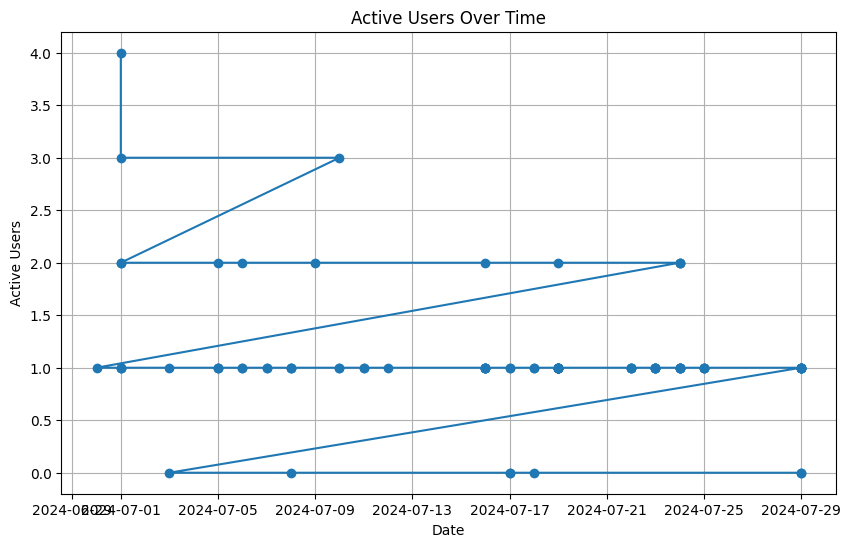

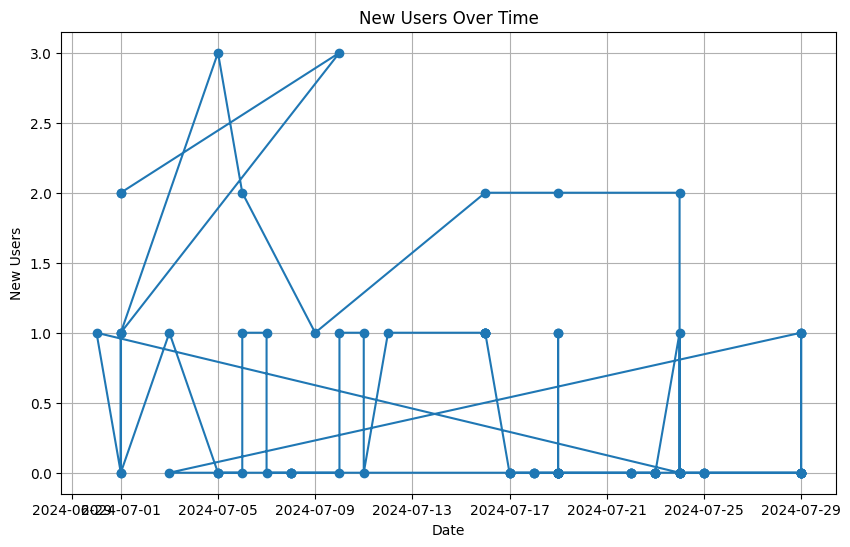

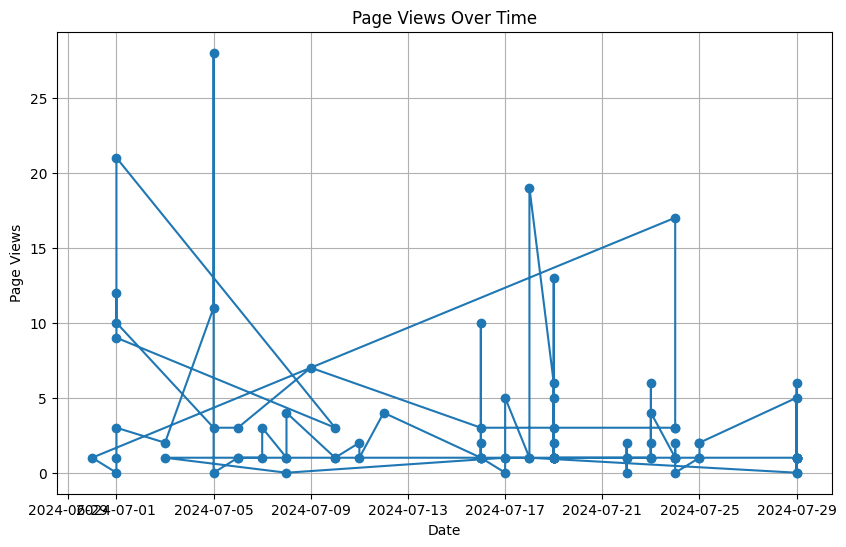

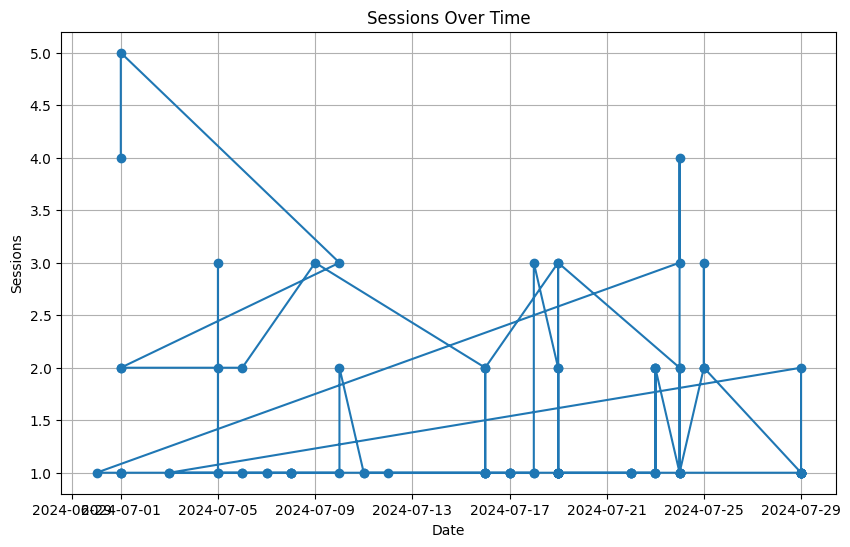

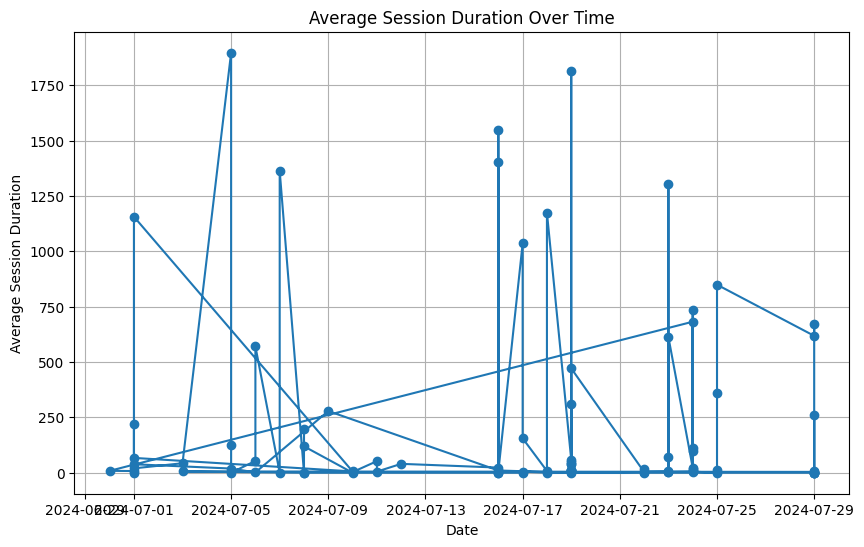

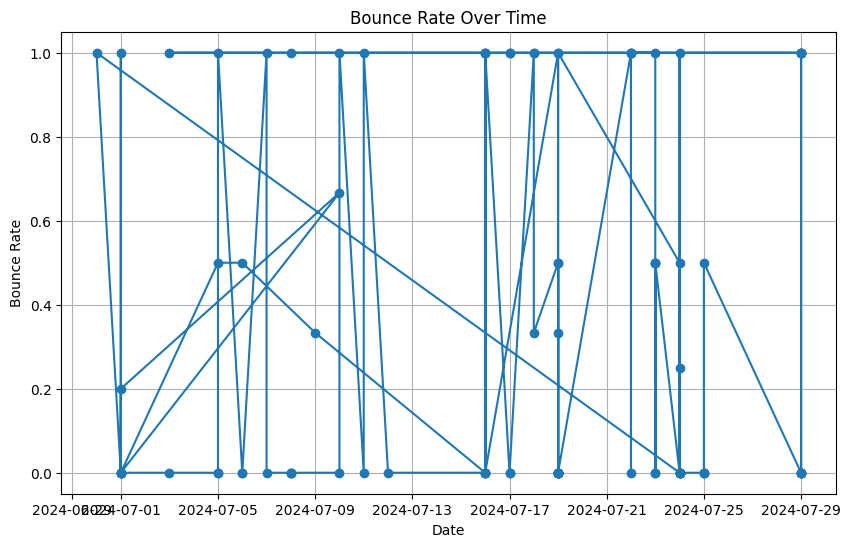

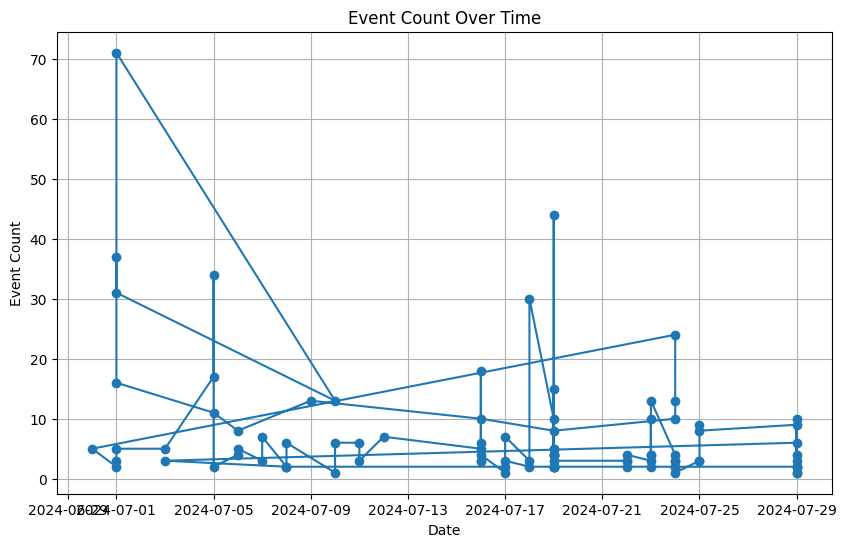

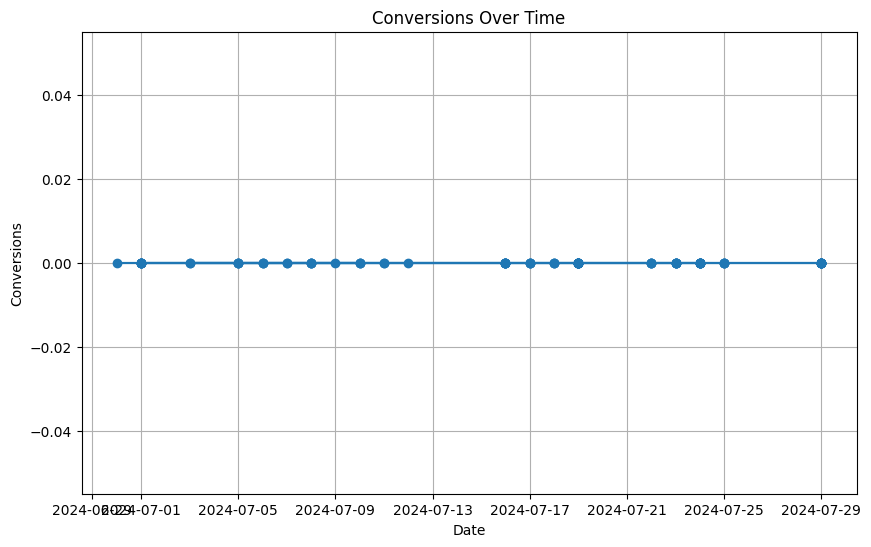

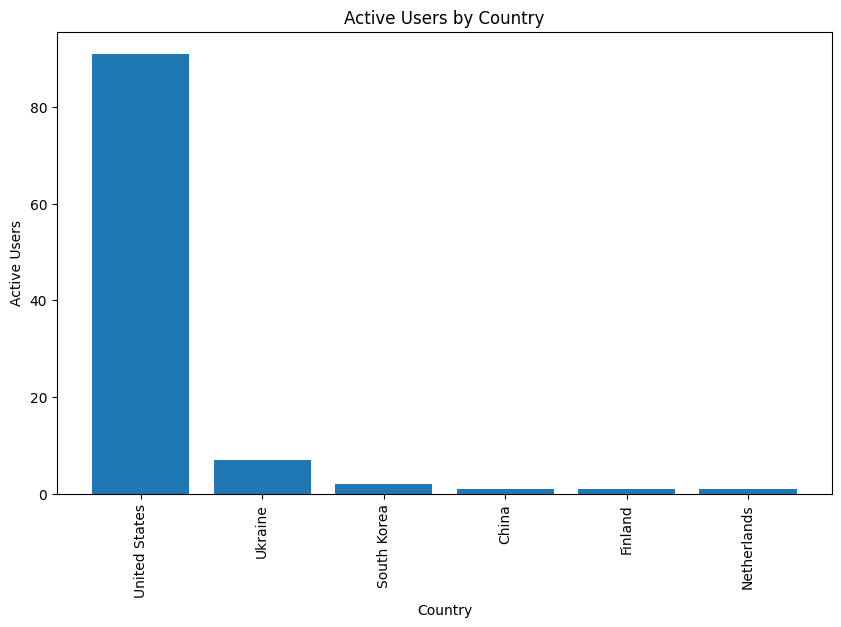

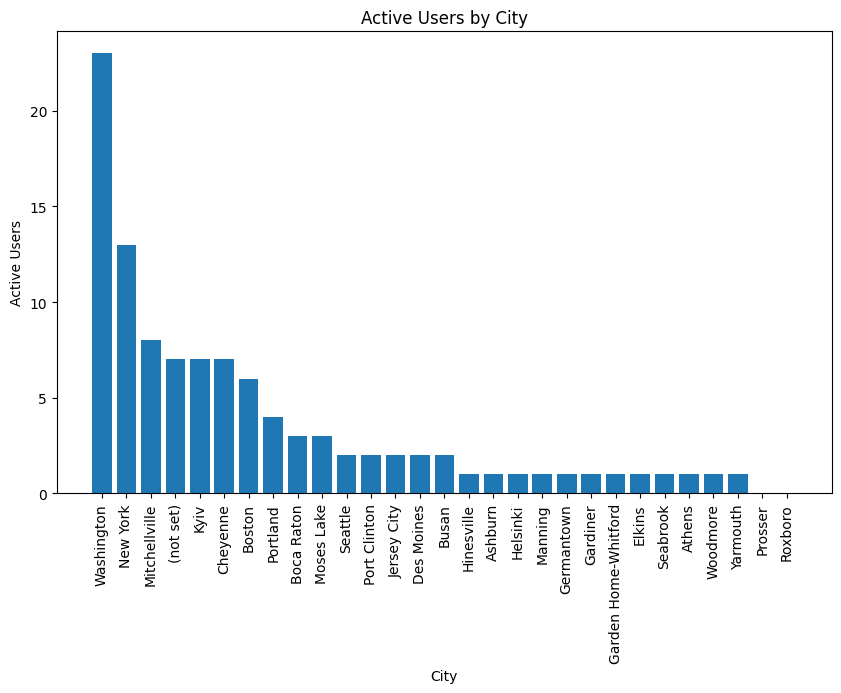

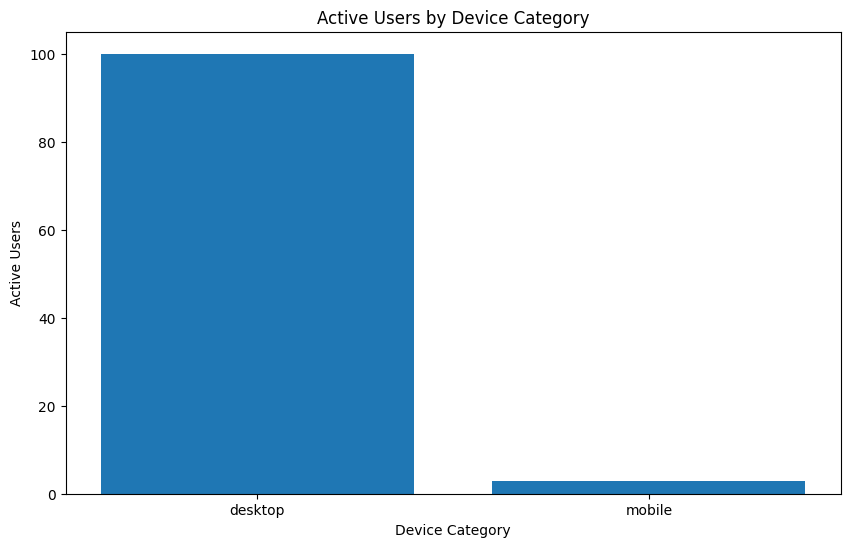

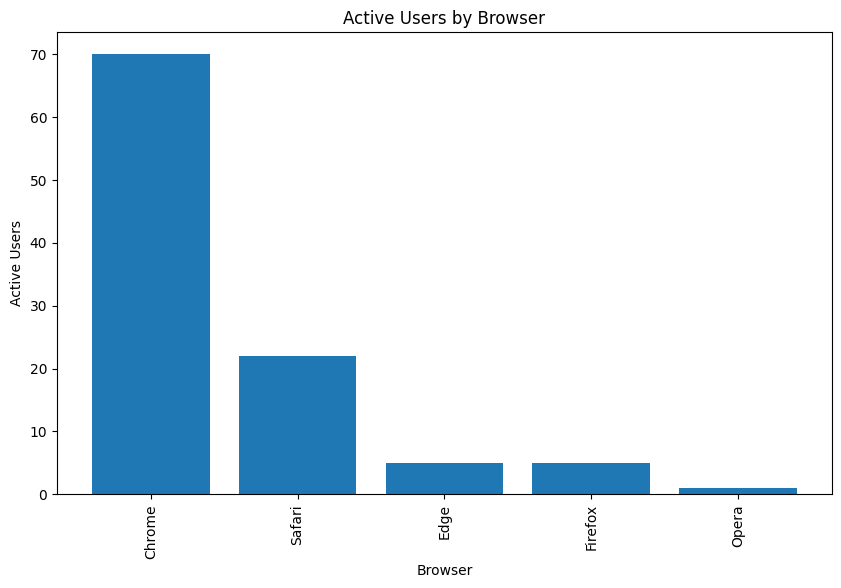

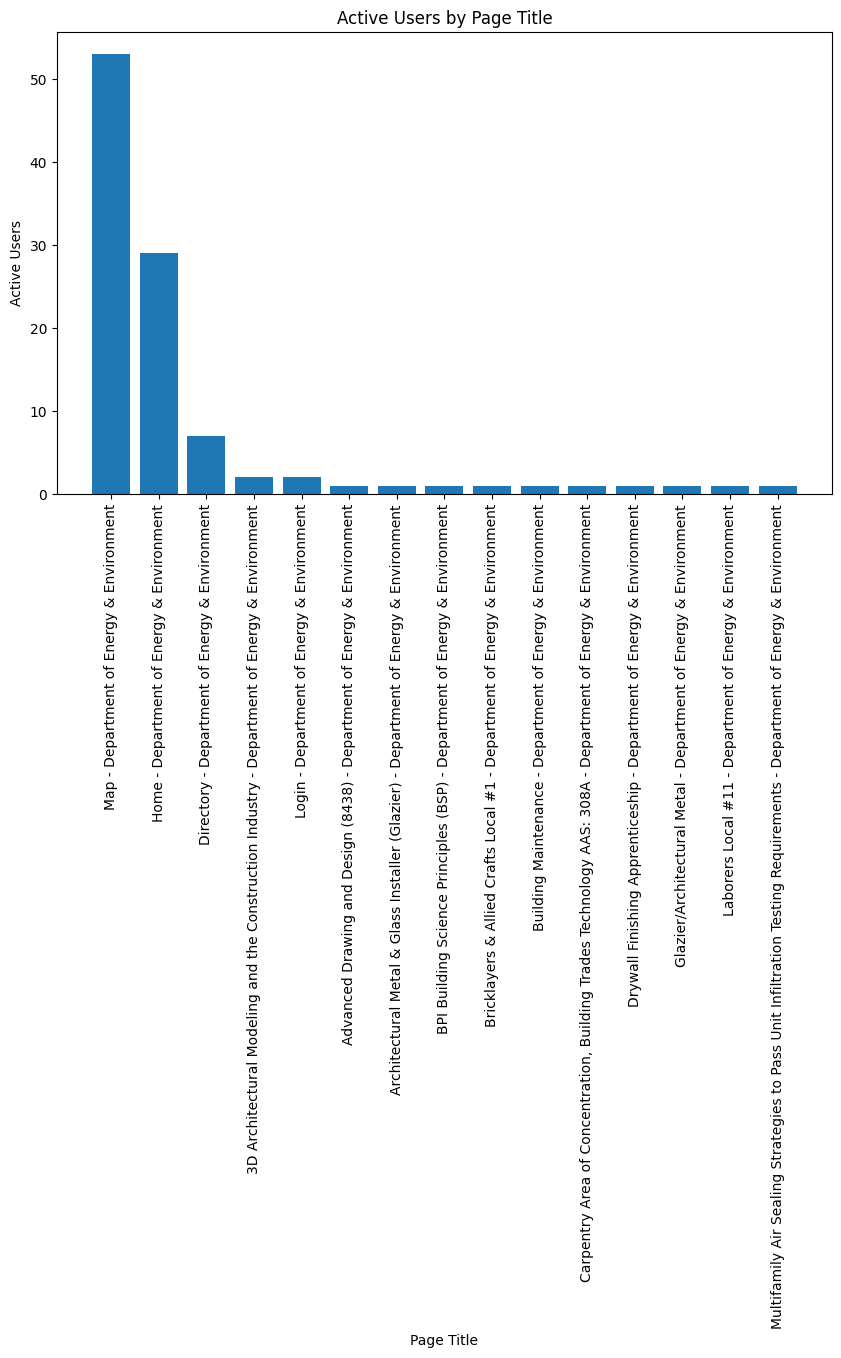

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
from google.oauth2 import service_account
from google.analytics.data_v1beta import BetaAnalyticsDataClient
from google.analytics.data_v1beta.types import RunReportRequest

# JSON secret key file 
KEY_FILE_LOCATION = 'development.json'  # Ensure this path is correct
SCOPES = ['https://www.googleapis.com/auth/analytics.readonly']
PROPERTY_ID = '414149946'  # Replace with your GA4 property ID

# Authenticate and construct the service
credentials = service_account.Credentials.from_service_account_file(
    KEY_FILE_LOCATION, scopes=SCOPES)

client = BetaAnalyticsDataClient(credentials=credentials)

def get_report(client, metrics, dimensions):
    request = RunReportRequest(
        property=f"properties/{PROPERTY_ID}",
        date_ranges=[{"start_date": "30daysAgo", "end_date": "today"}],
        dimensions=[{"name": dim} for dim in dimensions],
        metrics=[{"name": met} for met in metrics]
    )
    response = client.run_report(request)
    return response

def parse_response(response, dimensions, metrics):
    rows = []
    for row in response.rows:
        row_data = [row.dimension_values[i].value for i in range(len(dimensions))] + \
                   [row.metric_values[i].value for i in range(len(metrics))]
        rows.append(row_data)
    columns = dimensions + metrics
    df = pd.DataFrame(rows, columns=columns)
    return df

metrics = [
    "activeUsers",
    "newUsers",
    "screenPageViews",
    "sessions",
    "averageSessionDuration",
    "bounceRate",
    "eventCount",
    "conversions"
]

dimensions = [
    "date",
    "country",
    "city",
    "deviceCategory",
    "browser",
    "pageTitle"
]

try:
    response = get_report(client, metrics, dimensions)
    df = parse_response(response, dimensions, metrics)
    print(df)

    # Ensure all metric columns are numeric
    for metric in metrics:
        if metric in df.columns:
            df[metric] = pd.to_numeric(df[metric], errors='coerce')

    # Plot Active Users Over Time
    if 'date' in df.columns and 'activeUsers' in df.columns:
        df['date'] = pd.to_datetime(df['date'])
        plt.figure(figsize=(10, 6))
        plt.plot(df['date'], df['activeUsers'], marker='o')
        plt.title('Active Users Over Time')
        plt.xlabel('Date')
        plt.ylabel('Active Users')
        plt.grid(True)
        plt.show()

    # Plot New Users Over Time
    if 'date' in df.columns and 'newUsers' in df.columns:
        plt.figure(figsize=(10, 6))
        plt.plot(df['date'], df['newUsers'], marker='o')
        plt.title('New Users Over Time')
        plt.xlabel('Date')
        plt.ylabel('New Users')
        plt.grid(True)
        plt.show()

    # Plot Page Views Over Time
    if 'date' in df.columns and 'screenPageViews' in df.columns:
        plt.figure(figsize=(10, 6))
        plt.plot(df['date'], df['screenPageViews'], marker='o')
        plt.title('Page Views Over Time')
        plt.xlabel('Date')
        plt.ylabel('Page Views')
        plt.grid(True)
        plt.show()

    # Plot Sessions Over Time
    if 'date' in df.columns and 'sessions' in df.columns:
        plt.figure(figsize=(10, 6))
        plt.plot(df['date'], df['sessions'], marker='o')
        plt.title('Sessions Over Time')
        plt.xlabel('Date')
        plt.ylabel('Sessions')
        plt.grid(True)
        plt.show()

    # Plot Average Session Duration Over Time
    if 'date' in df.columns and 'averageSessionDuration' in df.columns:
        plt.figure(figsize=(10, 6))
        plt.plot(df['date'], df['averageSessionDuration'], marker='o')
        plt.title('Average Session Duration Over Time')
        plt.xlabel('Date')
        plt.ylabel('Average Session Duration')
        plt.grid(True)
        plt.show()

    # Plot Bounce Rate Over Time
    if 'date' in df.columns and 'bounceRate' in df.columns:
        plt.figure(figsize=(10, 6))
        plt.plot(df['date'], df['bounceRate'], marker='o')
        plt.title('Bounce Rate Over Time')
        plt.xlabel('Date')
        plt.ylabel('Bounce Rate')
        plt.grid(True)
        plt.show()

    # Plot Event Count Over Time
    if 'date' in df.columns and 'eventCount' in df.columns:
        plt.figure(figsize=(10, 6))
        plt.plot(df['date'], df['eventCount'], marker='o')
        plt.title('Event Count Over Time')
        plt.xlabel('Date')
        plt.ylabel('Event Count')
        plt.grid(True)
        plt.show()

    # Plot Conversions Over Time
    if 'date' in df.columns and 'conversions' in df.columns:
        plt.figure(figsize=(10, 6))
        plt.plot(df['date'], df['conversions'], marker='o')
        plt.title('Conversions Over Time')
        plt.xlabel('Date')
        plt.ylabel('Conversions')
        plt.grid(True)
        plt.show()

    # Plot Active Users by Country
    if 'country' in df.columns and 'activeUsers' in df.columns:
        country_df = df.groupby('country')['activeUsers'].sum().reset_index()
        country_df = country_df.sort_values(by='activeUsers', ascending=False)
        plt.figure(figsize=(10, 6))
        plt.bar(country_df['country'], country_df['activeUsers'])
        plt.title('Active Users by Country')
        plt.xlabel('Country')
        plt.ylabel('Active Users')
        plt.xticks(rotation=90)
        plt.show()

    # Plot Active Users by City
    if 'city' in df.columns and 'activeUsers' in df.columns:
        city_df = df.groupby('city')['activeUsers'].sum().reset_index()
        city_df = city_df.sort_values(by='activeUsers', ascending=False)
        plt.figure(figsize=(10, 6))
        plt.bar(city_df['city'], city_df['activeUsers'])
        plt.title('Active Users by City')
        plt.xlabel('City')
        plt.ylabel('Active Users')
        plt.xticks(rotation=90)
        plt.show()

    # Plot Active Users by Device Category
    if 'deviceCategory' in df.columns and 'activeUsers' in df.columns:
        device_df = df.groupby('deviceCategory')['activeUsers'].sum().reset_index()
        plt.figure(figsize=(10, 6))
        plt.bar(device_df['deviceCategory'], device_df['activeUsers'])
        plt.title('Active Users by Device Category')
        plt.xlabel('Device Category')
        plt.ylabel('Active Users')
        plt.show()

    # Plot Active Users by Browser
    if 'browser' in df.columns and 'activeUsers' in df.columns:
        browser_df = df.groupby('browser')['activeUsers'].sum().reset_index()
        browser_df = browser_df.sort_values(by='activeUsers', ascending=False)
        plt.figure(figsize=(10, 6))
        plt.bar(browser_df['browser'], browser_df['activeUsers'])
        plt.title('Active Users by Browser')
        plt.xlabel('Browser')
        plt.ylabel('Active Users')
        plt.xticks(rotation=90)
        plt.show()

    # Plot Active Users by Page Title
    if 'pageTitle' in df.columns and 'activeUsers' in df.columns:
        page_df = df.groupby('pageTitle')['activeUsers'].sum().reset_index()
        page_df = page_df.sort_values(by='activeUsers', ascending=False)
        plt.figure(figsize=(10, 6))
        plt.bar(page_df['pageTitle'], page_df['activeUsers'])
        plt.title('Active Users by Page Title')
        plt.xlabel('Page Title')
        plt.ylabel('Active Users')
        plt.xticks(rotation=90)
        plt.show()

except Exception as e:
    print(e)